In [2]:
import tensorflow as tf

In [3]:
BATCH_SIZE = 4
IMAGE_SIZE = 256
CHANNELS=3

In [4]:
data=tf.keras.preprocessing.image_dataset_from_directory(
    'photos',
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True
)

Found 40 files belonging to 13 classes.


In [5]:
len(data)

10

In [6]:
class_names = data.class_names
class_names

['Abnormal leaf fall disease',
 'Bark Feeding Caterpillar',
 'Birds eye spot',
 'Black stripe',
 'Borer beetles',
 'Brown root disease',
 'Colletotrichum leaf disease',
 'Corynespora leaf disease',
 'Dry Rot',
 'Patch Canker',
 'Powdery mildew disease',
 'Shoot rot',
 'Yellowing']

In [7]:
data

<BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [8]:
for image_batch,label_batch in data.take(1):
    print("Image shape:",image_batch.shape)
    print("Labels in one batch (tensor):",label_batch)
    print("Labels in one batch(numpy):",label_batch.numpy())

Image shape: (4, 256, 256, 3)
Labels in one batch (tensor): tf.Tensor([9 0 7 9], shape=(4,), dtype=int32)
Labels in one batch(numpy): [9 0 7 9]


In [9]:
for img,labels in data:
    print(labels)

tf.Tensor([ 7  2 10  7], shape=(4,), dtype=int32)
tf.Tensor([10  4  6  7], shape=(4,), dtype=int32)
tf.Tensor([10  7  8 12], shape=(4,), dtype=int32)
tf.Tensor([9 8 5 1], shape=(4,), dtype=int32)
tf.Tensor([7 9 7 6], shape=(4,), dtype=int32)
tf.Tensor([ 2 12  8  0], shape=(4,), dtype=int32)
tf.Tensor([11 10  2  7], shape=(4,), dtype=int32)
tf.Tensor([0 6 0 8], shape=(4,), dtype=int32)
tf.Tensor([2 5 0 0], shape=(4,), dtype=int32)
tf.Tensor([3 9 4 5], shape=(4,), dtype=int32)


In [10]:
for img,labels in data.take(1):
    print(img[0].numpy())
    print("Shape of the first image in the batch 1:",img[0].shape)

[[[227.42188  236.41113  175.03125 ]
  [197.70312  220.60938  156.4541  ]
  [208.72559  224.42871  180.02246 ]
  ...
  [130.04492  115.649414  69.375   ]
  [138.20312  133.82812   79.06348 ]
  [152.86426  148.86426  103.86426 ]]

 [[208.1416   223.1416   157.92285 ]
  [204.57812  225.6123   184.9248  ]
  [212.80176  229.80176  197.58301 ]
  ...
  [138.58301  130.24512   91.265625]
  [150.27832  143.27832  101.05957 ]
  [158.       151.       105.0957  ]]

 [[207.75684  224.98242  170.41309 ]
  [217.       233.51562  188.0625  ]
  [210.4248   226.45605  169.51855 ]
  ...
  [148.36914  146.36914  107.36914 ]
  [151.96875  148.9375   110.453125]
  [158.10254  162.07129  106.586914]]

 ...

 [[184.18066  190.18066  127.211914]
  [189.85938  188.48438  127.171875]
  [184.06543  184.06543  123.09668 ]
  ...
  [101.703125  80.799805  50.200195]
  [118.484375 111.796875  59.796875]
  [118.875    122.90625   66.359375]]

 [[168.78125  178.78125  118.78125 ]
  [170.09375  179.20312  116.421875]


In [11]:
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


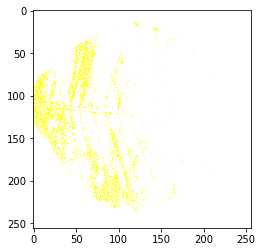

In [12]:
#float values
for img,labels in data.take(1):
    plt.imshow(img[0].numpy())

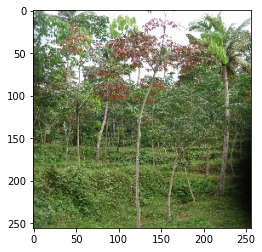

In [13]:
for img,labels in data.take(1):
    plt.imshow(img[0].numpy().astype("uint8"))

<ipython-input-14-5f4fc2ef9533>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3,4,i+1)


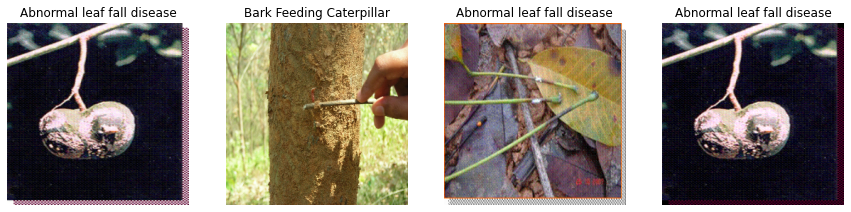

In [14]:
plt.figure(figsize=(15, 15))
for img,labels in data:
    for i in range(4):
        plt.subplot(3,4,i+1)
        plt.imshow(img[i].numpy().astype("uint8"))
        plt.axis("off")#removing numbers
        plt.title(class_names[labels[i]])

In [15]:
train_ds=data.take(10)

In [16]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [17]:
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential

In [18]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [19]:
num_classes = 13
model = Sequential([
   resize_and_rescale,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(train_ds,batch_size=BATCH_SIZE, epochs=10)   

Epoch 1/10
10/10 [==============================] - 2s 99ms/step - loss: 3.1818 - accuracy: 0.1772
Epoch 2/10
10/10 [==============================] - 1s 101ms/step - loss: 2.4666 - accuracy: 0.3925
Epoch 3/10
10/10 [==============================] - 1s 96ms/step - loss: 2.0312 - accuracy: 0.3016
Epoch 4/10
10/10 [==============================] - 1s 97ms/step - loss: 1.4281 - accuracy: 0.6345
Epoch 5/10
10/10 [==============================] - 1s 97ms/step - loss: 0.6254 - accuracy: 0.8779
Epoch 6/10
10/10 [==============================] - 1s 101ms/step - loss: 0.4912 - accuracy: 0.8569
Epoch 7/10
10/10 [==============================] - 1s 95ms/step - loss: 0.4268 - accuracy: 0.9167
Epoch 8/10
10/10 [==============================] - 1s 99ms/step - loss: 0.1992 - accuracy: 1.0000
Epoch 9/10
10/10 [==============================] - 1s 99ms/step - loss: 0.0287 - accuracy: 1.0000
Epoch 10/10
10/10 [==============================] - 1s 104ms/step - loss: 0.0077 - accuracy: 1.0000


In [22]:
test_data=tf.keras.preprocessing.image_dataset_from_directory(
    'test',
    image_size=(256,256),
    batch_size=1,
    shuffle=False
)

Found 13 files belonging to 13 classes.


In [23]:
for image_batch, labels_batch in test_data.take(3):
    print(image_batch.shape)
    print(labels_batch.numpy())

(1, 256, 256, 3)
[0]
(1, 256, 256, 3)
[1]
(1, 256, 256, 3)
[2]


In [24]:
len(test_data)

13

In [25]:
test_ds=test_data.take(13)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [26]:
scores = model.evaluate(test_ds)
print('Test accuracy:', scores[1])

13/13 [==============================] - 0s 12ms/step - loss: 3.9493 - accuracy: 0.3077
Test accuracy: 0.3076923191547394


In [27]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
  layers.experimental.preprocessing.RandomZoom(height_factor=(-0.05, -0.15),width_factor=(-0.05, -0.15))
])

<ipython-input-28-92d542854fe4>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(3, 3, i + 1)


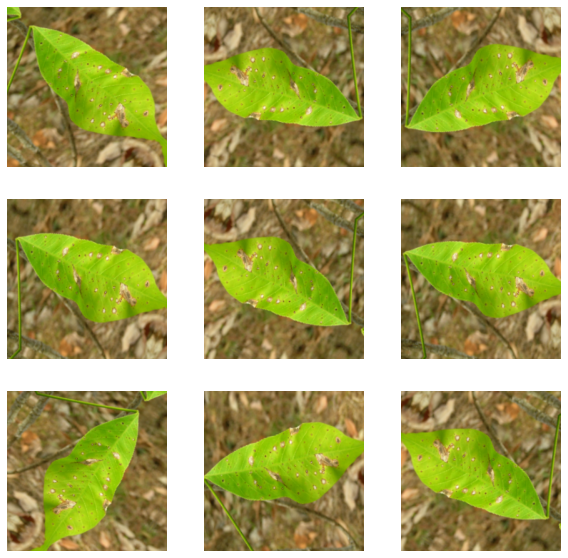

In [28]:
plt.figure(figsize=(10, 10))
for img,labels in data:
    for i in range(9):
        augmented_image = data_augmentation(img)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_image[3].numpy().astype("uint8"))
        plt.axis("off")

In [29]:
train_ds1 = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [54]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 13

model = models.Sequential([
    data_augmentation,
    resize_and_rescale,
    layers.Conv2D(128, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(13, activation='softmax'),
])

model.build(input_shape=input_shape)

In [55]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 256, 256, 3)       0         
_________________________________________________________________
sequential (Sequential)      (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (4, 254, 254, 128)        3584      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (4, 127, 127, 128)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (4, 125, 125, 128)        147584    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (4, 62, 62, 128)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (4, 60, 60, 64)          

In [56]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [57]:
history = model.fit(
    train_ds1,
    batch_size=BATCH_SIZE,
    epochs=20,
)

Epoch 1/20
10/10 [==============================] - 5s 466ms/step - loss: 2.6070 - accuracy: 0.0724
Epoch 2/20
10/10 [==============================] - 5s 451ms/step - loss: 2.5552 - accuracy: 0.1269
Epoch 3/20
10/10 [==============================] - 5s 467ms/step - loss: 2.5123 - accuracy: 0.1383
Epoch 4/20
10/10 [==============================] - 5s 477ms/step - loss: 2.4436 - accuracy: 0.2037
Epoch 5/20
10/10 [==============================] - 5s 499ms/step - loss: 2.4316 - accuracy: 0.1865
Epoch 6/20
10/10 [==============================] - 5s 499ms/step - loss: 2.4581 - accuracy: 0.1429
Epoch 7/20
10/10 [==============================] - 5s 499ms/step - loss: 2.1572 - accuracy: 0.2603
Epoch 8/20
10/10 [==============================] - 5s 490ms/step - loss: 2.2482 - accuracy: 0.1308
Epoch 9/20
10/10 [==============================] - 5s 495ms/step - loss: 2.0731 - accuracy: 0.1511
Epoch 10/20
10/10 [==============================] - 5s 481ms/step - loss: 1.9589 - accuracy: 0.2659

In [58]:
scores = model.evaluate(test_ds)
print('Test accuracy:', scores[1])

13/13 [==============================] - 1s 33ms/step - loss: 2.9228 - accuracy: 0.2308
Test accuracy: 0.23076923191547394


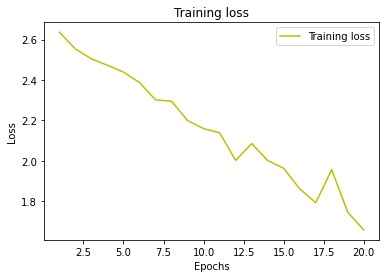

In [59]:
#plot the training and validation loss at each epoch
from scipy import stats
loss = history.history['loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

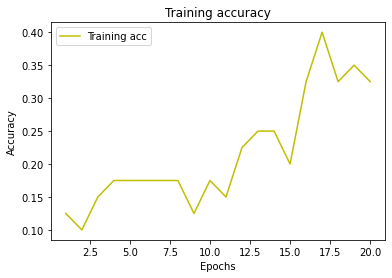

In [60]:
acc = history.history['accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [61]:
y_pred = model.predict(test_ds)

In [62]:
import numpy as np
y_pred_classes = np.argmax(y_pred, axis = 1)
y_pred_classes

array([0, 7, 0, 0, 9, 2, 2, 8, 8, 9, 0, 0, 9], dtype=int64)

first image to predict
actual label: Dry Rot
predicted label: Dry Rot


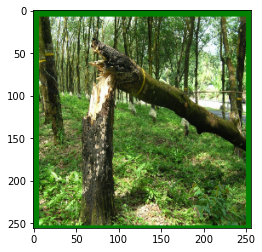

In [110]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])